### Librerias

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

### Download Data

In [3]:
test_data = pd.read_csv("data/test.csv")
train_data = pd.read_csv("data/train.csv")

In [6]:
train_data

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.53,Very Good,G,SI1,63.4,54.0,5.09,5.13,3.24,7.057
1,1,0.41,Ideal,D,SI1,63.0,56.0,4.80,4.75,3.01,6.824
2,2,0.32,Ideal,I,VS2,61.6,56.0,4.37,4.39,2.70,6.107
3,3,0.31,Ideal,H,VVS2,61.2,56.0,4.34,4.37,2.66,6.390
4,4,1.35,Premium,J,VS2,60.5,56.0,7.19,7.12,4.33,8.741
...,...,...,...,...,...,...,...,...,...,...,...
40450,40450,0.52,Premium,D,VS2,61.2,58.0,5.16,5.20,3.17,7.508
40451,40451,0.52,Ideal,F,SI1,62.0,55.0,5.14,5.17,3.19,7.232
40452,40452,0.73,Very Good,D,VS2,63.5,58.0,5.68,5.72,3.62,8.065
40453,40453,0.31,Fair,F,VVS2,56.9,59.0,4.45,4.48,2.54,6.629


### General Data Description

Column Description:

- Price is in US dollars
- Carat weight of the diamond
- Cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- color diamond colour, from J (worst) to D (best)
- clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- x length in mm
- y width in mm
- z depth in m
- depth: The height of a diamond
- table: The width of the diamond’s table expressed as a percentage of its average diameter

### Test_data

In [223]:
test_data

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74
1,1,0.41,Ideal,E,VS2,61.8,54.0,4.79,4.76,2.95
2,2,0.91,Very Good,E,SI2,62.5,59.0,6.16,6.23,3.87
3,3,0.42,Very Good,G,VS2,62.6,57.0,4.76,4.80,2.99
4,4,0.54,Ideal,G,IF,61.5,56.0,5.28,5.25,3.24
...,...,...,...,...,...,...,...,...,...,...
13480,13480,0.55,Ideal,F,SI1,61.7,56.4,5.26,5.30,3.25
13481,13481,1.12,Premium,H,VS2,60.6,59.0,6.77,6.70,4.08
13482,13482,0.37,Ideal,D,SI1,61.5,57.0,4.63,4.60,2.84
13483,13483,0.54,Good,E,SI1,59.9,63.0,5.25,5.30,3.16


In [224]:
test_data.dtypes

id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
dtype: object

In [225]:
test_data.isna().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

In [226]:
test_data.describe()

,id,carat,depth,table,x,y,z
count,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000
mean,6742.000000,0.806748,61.742455,57.475336,5.750646,5.755216,3.549901
std,3892.928525,0.480789,1.423544,2.246018,1.127986,1.142190,0.699999
min,0.000000,0.200000,52.300000,49.000000,0.000000,0.000000,0.000000
25%,3371.000000,0.400000,61.000000,56.000000,4.720000,4.730000,2.910000
50%,6742.000000,0.710000,61.800000,57.000000,5.710000,5.730000,3.530000
75%,10113.000000,1.050000,62.500000,59.000000,6.560000,6.550000,4.040000
max,13484.000000,5.010000,79.000000,95.000000,10.740000,31.800000,6.980000


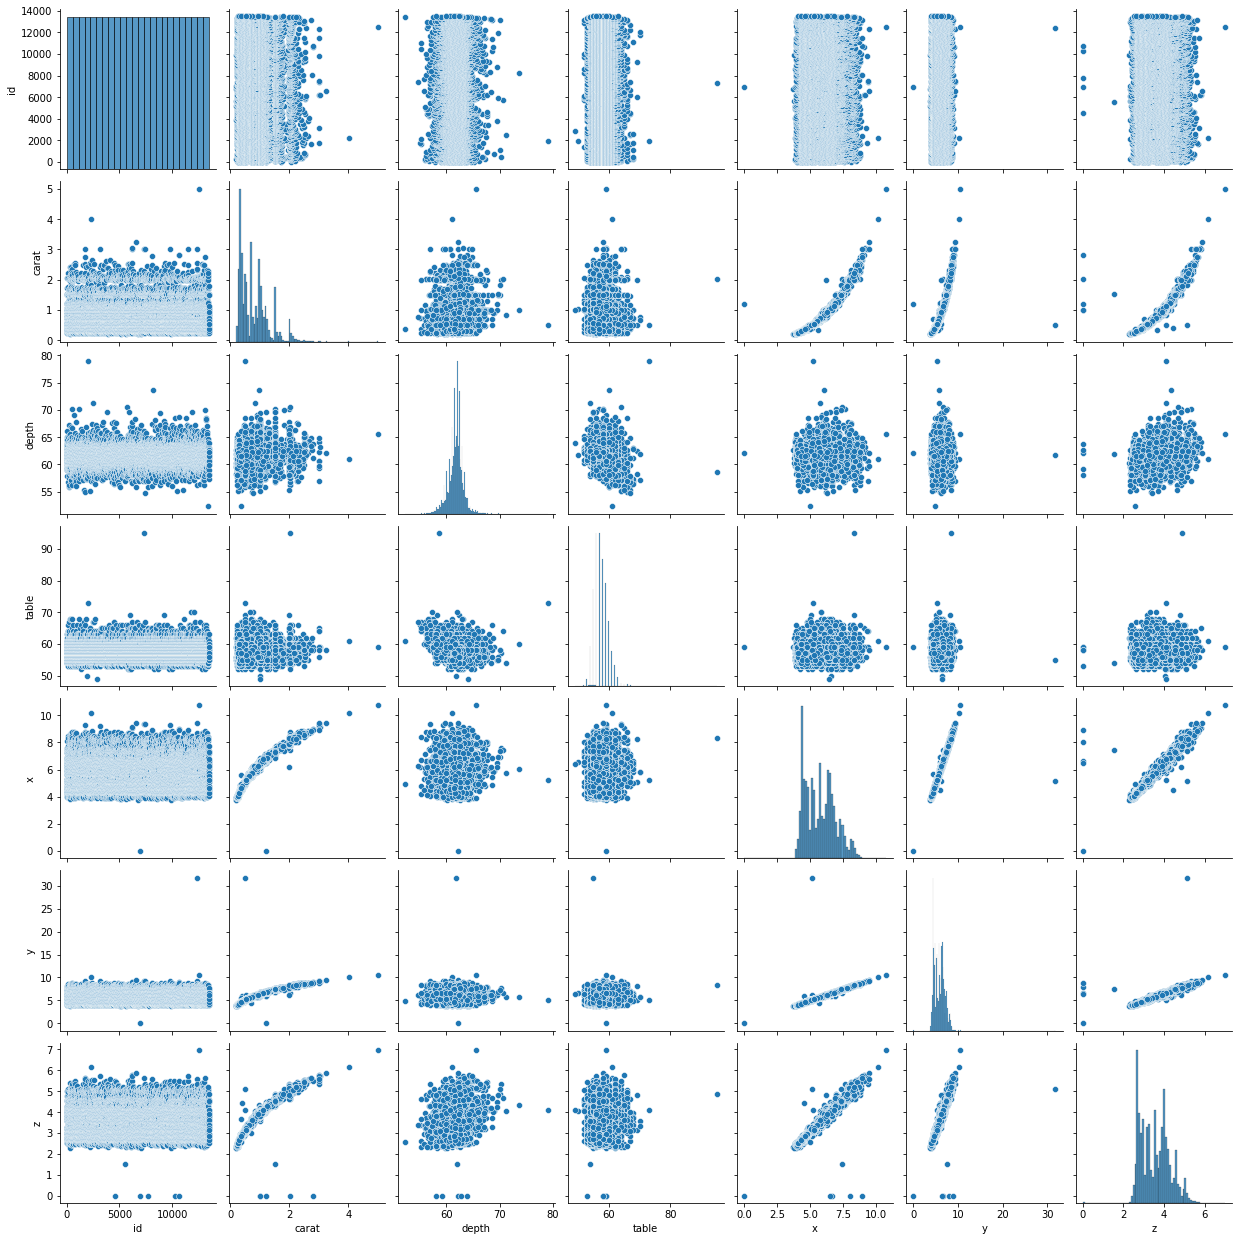

In [227]:
sns.pairplot(test_data)

In [228]:
test_data.corr()

,id,carat,depth,table,x,y,z
id,1.000000,-0.002581,0.009404,0.003284,-0.004933,-0.002390,-0.004134
carat,-0.002581,1.000000,0.037156,0.177766,0.976156,0.955018,0.967058
depth,0.009404,0.037156,1.000000,-0.287953,-0.016478,-0.018677,0.104789
table,0.003284,0.177766,-0.287953,1.000000,0.189640,0.178492,0.151778
x,-0.004933,0.976156,-0.016478,0.189640,1.000000,0.978368,0.984122
y,-0.002390,0.955018,-0.018677,0.178492,0.978368,1.000000,0.968676
z,-0.004134,0.967058,0.104789,0.151778,0.984122,0.968676,1.000000


### Train_data

In [229]:
train_data

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.53,Very Good,G,SI1,63.4,54.0,5.09,5.13,3.24,7.057
1,1,0.41,Ideal,D,SI1,63.0,56.0,4.80,4.75,3.01,6.824
2,2,0.32,Ideal,I,VS2,61.6,56.0,4.37,4.39,2.70,6.107
3,3,0.31,Ideal,H,VVS2,61.2,56.0,4.34,4.37,2.66,6.390
4,4,1.35,Premium,J,VS2,60.5,56.0,7.19,7.12,4.33,8.741
...,...,...,...,...,...,...,...,...,...,...,...
40450,40450,0.52,Premium,D,VS2,61.2,58.0,5.16,5.20,3.17,7.508
40451,40451,0.52,Ideal,F,SI1,62.0,55.0,5.14,5.17,3.19,7.232
40452,40452,0.73,Very Good,D,VS2,63.5,58.0,5.68,5.72,3.62,8.065
40453,40453,0.31,Fair,F,VVS2,56.9,59.0,4.45,4.48,2.54,6.629


In [230]:
train_data.dtypes

id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price      float64
dtype: object

In [231]:
train_data.isna().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [232]:
train_data.describe()

,id,carat,depth,table,x,y,z,price
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,20227.000000,0.795004,61.751722,57.451133,5.724661,5.727629,3.535011,7.781266
std,11678.496907,0.471700,1.435644,2.230630,1.119617,1.142047,0.707558,1.014051
min,0.000000,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,5.787000
25%,10113.500000,0.400000,61.100000,56.000000,4.710000,4.720000,2.910000,6.851000
50%,20227.000000,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,7.781000
75%,30340.500000,1.040000,62.500000,59.000000,6.530000,6.530000,4.030000,8.575000
max,40454.000000,4.500000,79.000000,79.000000,10.230000,58.900000,31.800000,9.843000


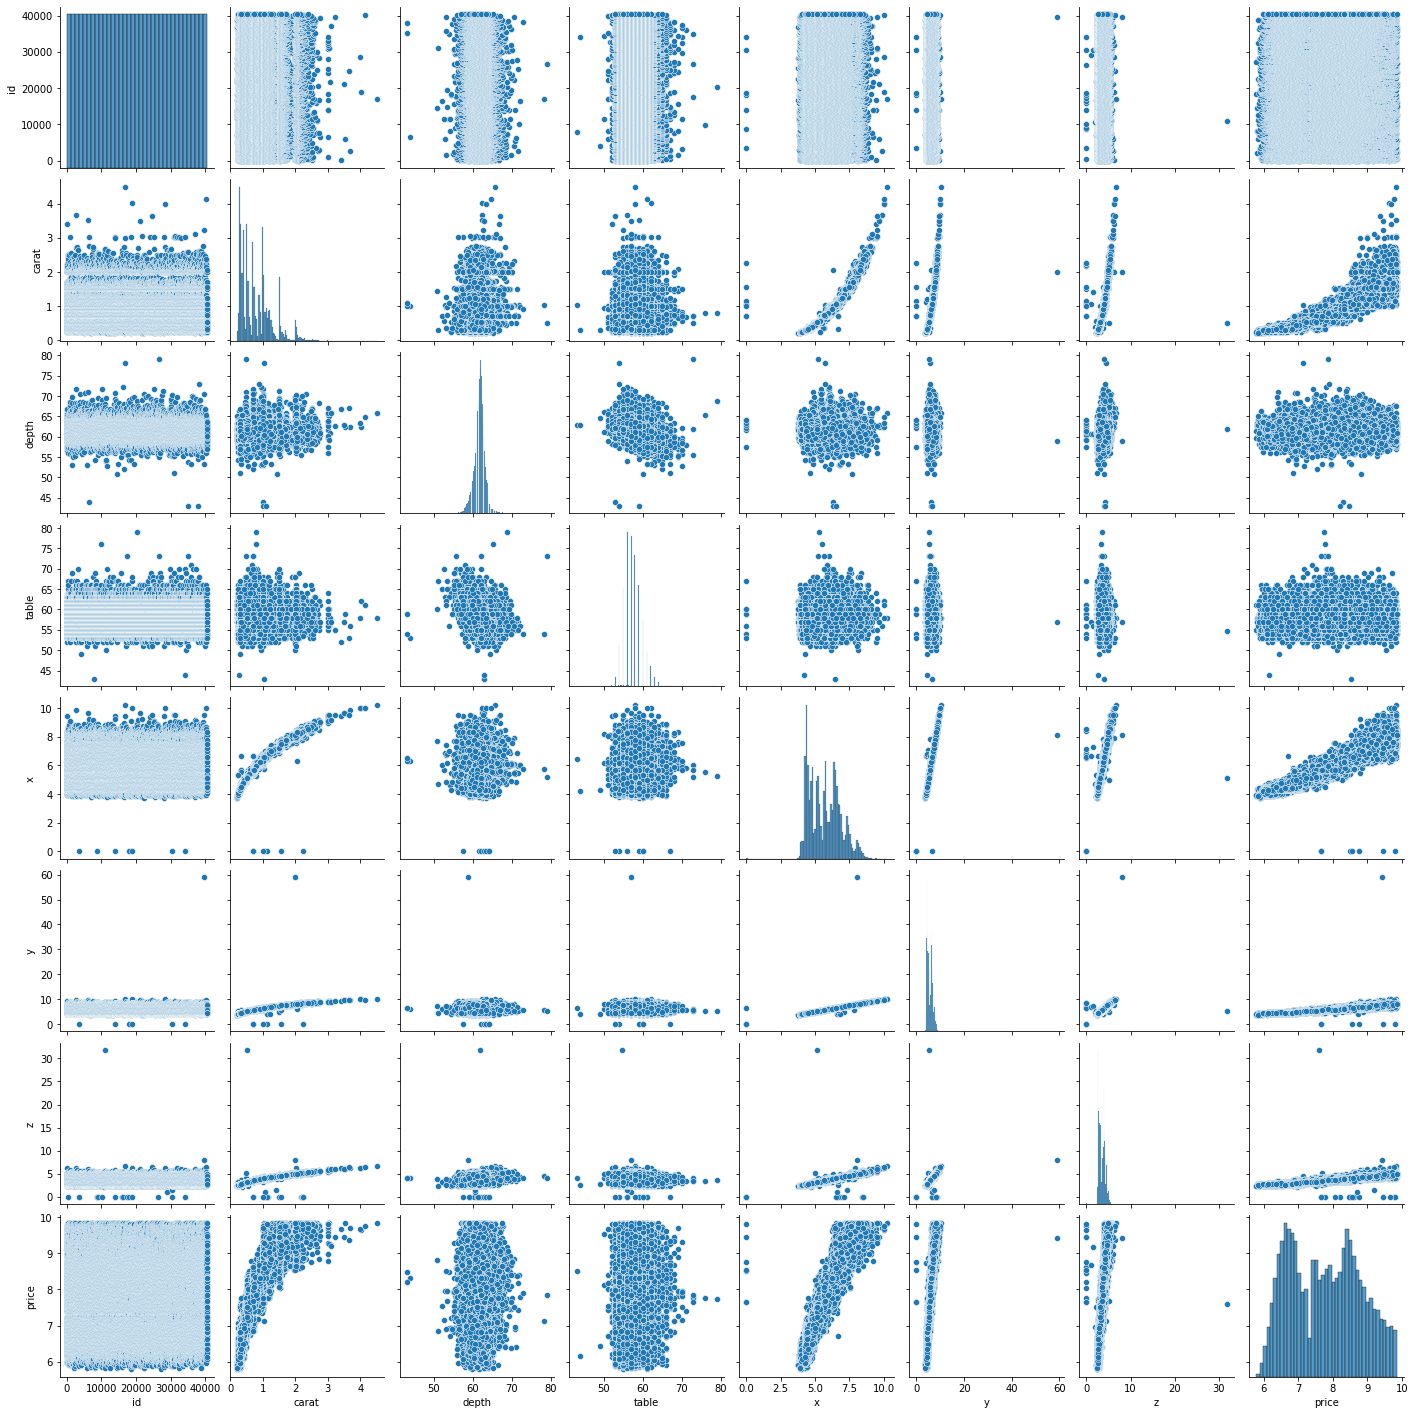

In [233]:
sns.pairplot(train_data)

In [234]:
print(train_data.apply(np.max))

id             40454
carat            4.5
cut        Very Good
color              J
clarity         VVS2
depth             79
table             79
x              10.23
y               58.9
z               31.8
price          9.843
dtype: object


In [235]:
print(train_data.apply(np.min))

id             0
carat        0.2
cut         Fair
color          D
clarity       I1
depth         43
table         43
x              0
y              0
z              0
price      5.787
dtype: object


In [236]:
 train_data.corr()

,id,carat,depth,table,x,y,z,price
id,1.000000,-0.006186,-0.002316,-0.010840,-0.005675,-0.004038,-0.005649,-0.004040
carat,-0.006186,1.000000,0.025261,0.182888,0.974744,0.950639,0.948895,0.920846
depth,-0.002316,0.025261,1.000000,-0.298380,-0.028188,-0.032829,0.091738,-0.000533
table,-0.010840,0.182888,-0.298380,1.000000,0.197226,0.185480,0.150606,0.159950
x,-0.005675,0.974744,-0.028188,0.197226,1.000000,0.973473,0.966374,0.957934
y,-0.004038,0.950639,-0.032829,0.185480,0.973473,1.000000,0.946517,0.934832
z,-0.005649,0.948895,0.091738,0.150606,0.966374,0.946517,1.000000,0.931147
price,-0.004040,0.920846,-0.000533,0.159950,0.957934,0.934832,0.931147,1.000000


In [237]:
 train_data.corr()["price"].sort_values()

id      -0.004040
depth   -0.000533
table    0.159950
carat    0.920846
z        0.931147
y        0.934832
x        0.957934
price    1.000000
Name: price, dtype: float64

In [238]:
train_data["clarity"].unique()

array(['SI1', 'VS2', 'VVS2', 'SI2', 'VVS1', 'VS1', 'I1', 'IF'],
      dtype=object)

In [239]:
train_data["cut"].unique()

array(['Very Good', 'Ideal', 'Premium', 'Good', 'Fair'], dtype=object)

In [240]:
train_data["color"].unique()

array(['G', 'D', 'I', 'H', 'J', 'F', 'E'], dtype=object)